<a href="https://colab.research.google.com/github/CheYuuuu/TensorFlow/blob/main/and_or_xor%E9%82%8F%E8%BC%AF%E9%96%98_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 為何要自行設計？

使用Keras可以迅速訓練出模型，但次數限定可能無法到達目標

若依此設計可使用MSE大小決定何時停止訓練

### 流程

1. 設定初始值(輸入、目標、weight、神經元數目、神經元門檻值、Learning Rate)

2. 選擇activative function(sigmoid, tanh, ReLU...等)

3. iteration（順向計算-->使用梯度誤差往回修正weight和門檻值)-->直到MSE小於正確率或到達防呆次數


0.00.0
0.01.0
1.00.0
1.01.0
w0= 0.045799
w1= 0.468534
w2= 0.061457
w3= 0.663654
w4= 0.170657
w5= 0.588688
輸入：1<AND>,2<OR>,3<XOR>: 3
Your Learning Target is :
 [0.0, 1.0, 1.0, 0.0]
What is the MSE? Ex:0.01,0.001 or 0.0001: 0.001
======畫出調整後的紅直線，青色為原始設定線======


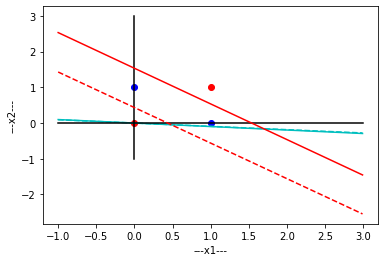

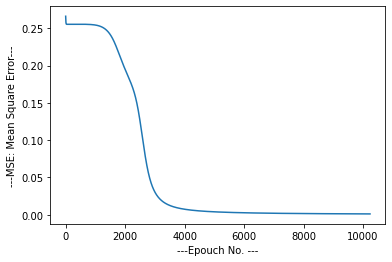

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
#設定初始值
xs = [(0.0,0.0),(0.0,1.0),(1.0,0.0),(1.0,1.0),] #input data #4*2的陣列
for i in range(4):#列印出輸入矩陣(控制高度用列，寬度用行)
    for j in range(2):
        print(float(xs[i][j]),end='')
    print()
yd=[0.0, 0.0, 0.0, 0.0,] #目標矩陣(初始先設0)
w=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0] #W13, W14, W23, W24, W35, W45
ya=[0.0, 0.0, 0.0] #Y3, Y4, Y5 三個神經元輸出
theta=[0.0, 0.0, 0.0] #T3, T4, T5 三個神經元的門檻
alpha=0.2 #Learning rate
x=np.arange(-1,3,0.01) #繪圖範圍 -1~3,每0.01產生一筆資料
epouch=0 #循環次數
training_times= 0 #訓練次數
MSElist=[]
def line1(A): #自行設計直線函數,Y3
    return (-A*w[0]+theta[0])/w[1]
def line2(A): #自行設計直線函數,Y4
    return (-A*w[2]+theta[1])/w[3]
def axis(A): #設計軸線函數
    return 0*A

#weight 取亂數值
for i in range(6):
    w[i]=random.random() #0.0<w[i]<1.0
    print('w%d= %f' % (i, w[i]))
#請使用者輸入資料
select = eval(input('輸入：1<AND>,2<OR>,3<XOR>: ')) #eval 轉換成可計算資料型態
if select == 1:
    yd=[0.0, 0.0, 0.0, 1.0]
    plt.plot([0],[0],'bo')
    plt.plot([0],[1],'bo')
    plt.plot([1],[0],'bo')
    plt.plot([1],[1],'ro')
if select == 2:
    yd=[0.0, 1.0, 1.0, 1.0]
    plt.plot([0],[0],'ro')
    plt.plot([0],[1],'bo')
    plt.plot([1],[0],'bo')
    plt.plot([1],[1],'bo')
if select == 3:
    yd=[0.0, 1.0, 1.0, 0.0]
    plt.plot([0],[0],'ro')
    plt.plot([0],[1],'bo')
    plt.plot([1],[0],'bo')
    plt.plot([1],[1],'ro')
print('Your Learning Target is :\n',yd)
plt.plot(x,line1(x),'c-') #初始Ｙ3
plt.plot(x,line2(x),'c--') #初始Y4
plt.plot(x,axis(x),'k-') #draw x軸
plt.plot(axis(x),x,'k-') #draw y軸
#training loop
SE=0.0 #Square Error
Accuracy=0.0 #精確度
MSE=1.0 #Mean Square Error
Accuracy=eval(input('What is the MSE? Ex:0.01,0.001 or 0.0001: '))
#eval : 將輸入值(字串)轉成evaluable
while (MSE > Accuracy and epouch <100000): #step 4 , Iteration
    epouch+=1
    #print('epouch=',epouch)
    SE=0.0 #SE是紀錄每次算的square erro，在迴圈最後一行是SE+= e*e，所以迴圈開始計算前先將SE歸零。
    for i in range(4):
        # SE=0.0
    #step 2a
        #feed forward  #calculate Y3 and Y4    
        ya[0]=1.0/(1.0+math.exp(-(xs[i][0]*w[0]+xs[i][1]*w[1]-theta[0])))#Y3
        ya[1]=1.0/(1.0+math.exp(-(xs[i][0]*w[2]+xs[i][1]*w[3]-theta[1])))#Y4
    #step 2b  #calculate Y5
        ya[2]=1.0/(1.0+math.exp(-(ya[0]*w[4]+ya[1]*w[5]-theta[2])))#Y5
        #print('Y3=%f,Y4=%f,Y5=%f'%(ya[0],ya[1],ya[2]))
    #step 3a
        e=yd[i]-ya[2] #real error
        ge5=ya[2]*(1.0-ya[2])*e #gradient error of Y5
        #change weights (Learning)
        #backward propragation
        w[4]=w[4]+alpha*ya[0]*ge5 #change w35
        w[5]=w[5]+alpha*ya[1]*ge5 #change w45
        theta[2]=theta[2]+(-alpha)*ge5 #change theta5
    #step 3b
        #error backward calculate!!!!!!!!!   IMPORTANT
        ge3=ya[0]*(1.0-ya[0])*ge5*w[4] #gradient error of Y1 with error-back
        ge4=ya[1]*(1.0-ya[1])*ge5*w[5] #gradient error of Y2 with error-back
        #change weights (Learning)
        w[0]=w[0]+alpha*xs[i][0]*ge3 #change w13
        w[1]=w[1]+alpha*xs[i][1]*ge3 #change w23
        w[2]=w[2]+alpha*xs[i][0]*ge4 #change w14
        w[3]=w[3]+alpha*xs[i][1]*ge4 #change w24
        theta[0]= theta[0]+(-alpha)*ge3 #change theta 1
        theta[1]= theta[1]+(-alpha)*ge4 #change theta 2
        SE+=e*e  #accumulatte square error
    MSE= SE/4.0 #計算每次循環之均方誤差值 (四筆資料的平均)
    #print('MSE= ',MSE) 
    MSElist.append(MSE)
print("======畫出調整後的紅直線，青色為原始設定線======")
plt.plot(x,line1(x),'r-')  #畫調整後直線Y3
plt.plot(x,line2(x),'r--') #畫調整後直線Y4
plt.xlabel('---x1---') #X座標軸說明
plt.ylabel('---x2---') #Y座標軸說明
plt.show()

plt.plot((range(epouch)),MSElist) #顯示誤差圖形
plt.xlabel('---Epouch No. ---') #X座標軸說明
plt.ylabel('---MSE: Mean Square Error---') #Y座標軸說明
plt.show()




